<a href="https://colab.research.google.com/github/CoralBau/Tarea-17-octubre/blob/main/Tarea_17_oct_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Quick Data Overview

In [1]:
import io 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
netflix_titles=pd.read_csv(io.BytesIO(uploaded["netflix_titles.csv"]))

In [4]:
df = pd.read_csv("netflix_titles.csv")

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.shape

(8807, 12)

2.Identify Missing Data

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
for column in df.columns:
  percentage=df[column].isnull().mean()
  print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


3. Dealing with Missing Data

In [10]:
df.drop("director", axis=1)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
mode =''.join(df["rating"].mode())
df["rating"].fillna(mode, inplace=True)

In [12]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
df["duration"].fillna(0, inplace=True)

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


4. Identifying Outliers

In [15]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [16]:
df_movie = df[df['type']=='Movie']
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(float))

In [17]:
df_movie["minute"]

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: minute, Length: 6131, dtype: float64

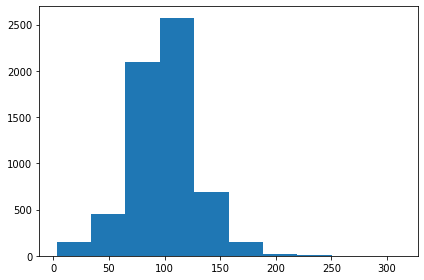

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

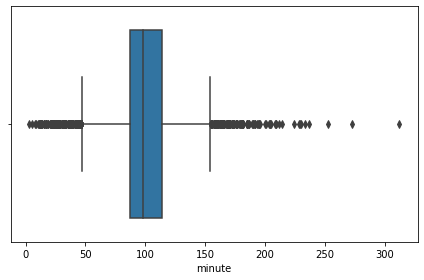

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

In [20]:
df_movie["minute"].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [21]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
iplot(fig)

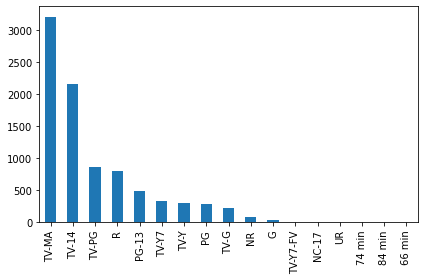

In [22]:
fig=df['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

5. Dealing with Outliers 

In [23]:
#outliers
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

6. Dealing with Inconsistent Data Before Merging 2 Dataframes

In [24]:
from google.colab import files 
uploaded = files.upload()

Saving netflix_originals.csv to netflix_originals.csv


In [25]:
df_originals = pd.read_csv('netflix_originals.csv')
df_originals.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)

In [27]:
df_originals

,title,release_year,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
...,...,...,...,...,...,...,...,...,...,...
1512,Ralphie May: Unruly,2015,Comedy,4.7,83 min,"Filmed in front of a raucous crowd, comedian R...","John Asher, Ralphie May",357,Movie,Netflix
1513,John Hodgman: Ragnarok,2013,"Comedy, Music",6.2,68 min,The deranged millionaire John Hodgman plays hi...,"Lance Bangs, John Hodgman, Scott Adsit, Cynthi...",292,Movie,Netflix
1514,Jimmy Carr: Funny Business,2016,Comedy,7.2,62 min,"A man, with an incredibly stupid laugh, tells ...","Sam Wrench, Jimmy Carr","3,445",Movie,Netflix
1515,Anthony Jeselnik: Thoughts and Prayers,2015,Comedy,7.8,59 min,Stand up comedian and former Late Night with J...,"Adam Dubin, Anthony Jeselnik, Peggy","4,300",Movie,Netflix


In [28]:
df_originals = df_originals.astype({"release_year": int})

In [29]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from fuzzywuzzy import process, fuzz
states = ['New York', 'California', 'Washington', 'Hawaii']
df_states = pd.DataFrame({'states':['NY', 'CA', 'Washington DC', 'Hawai']})
df_states[['match', 'score']] = df_states['states'].apply(lambda x:process.extractOne(x, states, scorer=fuzz.token_sort_ratio)).apply(pd.Series)
df_states

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



,states,match,score
0,NY,New York,40
1,CA,California,33
2,Washington DC,Washington,87
3,Hawai,Hawaii,91


7. Text Normalization

In [31]:
df_originals['title'] = df_originals['title'].apply(lambda x:x.lower())
df_originals['title'] = df_originals['title'].str.lower()

In [32]:
df_originals['title'] = df_originals['title'].apply(lambda x:x.strip())
df_originals['title'] = df_originals['title'].str.strip()

In [37]:
import re
df_originals['title'] = df_originals['title'].apply(lambda x:re.sub('[^\w\s]','',x))
df_originals['title'].replace('[^\w\s]', '', regex=True, inplace=True)

8. Merging Datasets

In [38]:
df_netflix = pd.merge(df_originals, df, on=['title', 'type', 'release_year'],
                           how='outer')
df_netflix['original'].fillna('Catalog', inplace=True)

In [39]:
df_netflix.drop_duplicates(['title'], keep='first', inplace=True)

In [40]:
df_netflix[['original', 'type']].value_counts()

original  type   
Catalog   Movie      6129
          TV Show    2674
Netflix   TV Show    1009
          Movie       504
dtype: int64